In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
temp = []

phimuls = [-2.0, -1.0, -0.5, -0.25, 0, 0.5, int(1)]
for phi_mul in phimuls:
    f = open(f"./outputs/TS_wmod1_500_bins_30_psrs_{phi_mul}_phi_fac.txt", 'r')
    temp.append(f.read().split('\n'))

In [3]:
tsmax = []
small_f = []
phio = []
phio_const = [(10**i) * 4.98e-27 for i in phimuls]  #[4.98e-29, 4.98e-28, 10**-0.75 * 4.98e-27, 10**-0.5 * 4.98e-27, 4.98e-27, 10**0.5 * 4.98e-27, 4.98e-26]
phio_const_norm = [i /4.98e-27 for i in phio_const]
for i in temp:
    tsmax.append(float(i[0]))
    small_f.append(float(i[1]))
    phio.append(float(i[2]))

In [4]:
np.sqrt(tsmax)

array([1.10809648e-05, 1.62794562e+01, 3.50496667e+01, 4.40702667e+01,
       5.86274647e+01, 6.99988154e+01, 7.56502470e+01])

In [5]:
phio_const

[4.98e-29,
 4.98e-28,
 1.5748142747638528e-27,
 2.8004597994479382e-27,
 4.98e-27,
 1.574814274763853e-26,
 4.9799999999999997e-26]

In [6]:
np.sqrt(tsmax[1])

16.27945620550535

In [7]:
phio_const = np.array(phio_const)/(1e-9)

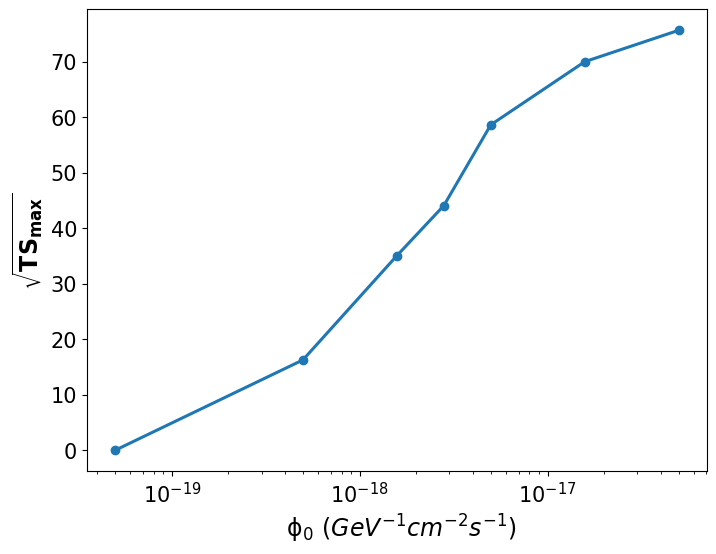

In [8]:
plt.figure(figsize=(8, 6))
axesfont = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 17,
        }
font = {'family': 'serif',
        'size': 22,
        'weight': 'bold',
        'color':  'black',
        }


plt.plot(phio_const, np.sqrt(tsmax), lw=2.2, ls='-')
# plt.hlines(5, 1e-20, 1e-18, colors='k', linestyles='dashed', lw=2.2)
plt.scatter(phio_const, np.sqrt(tsmax))
# plt.plot(small_f, tsmax)
# plt.xlim(4.98e-27)
plt.ylabel('$\mathbf{\sqrt{TS_{max}}}$', fontdict=axesfont)
plt.xlabel(' $\mathsf{\phi_0}$ $(GeV^{-1} cm^{-2} s^{-1})$', fontdict=axesfont)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xscale('log')
# plt.title('$\mathbf{\sqrt{TS_{max}}}$ vs $\mathsf{\phi_0}$', fontdict=font)
plt.savefig('./outputs/TSmax_phio_const.pdf', facecolor='w')
plt.show()


In [9]:
phio_const

array([4.98000000e-20, 4.98000000e-19, 1.57481427e-18, 2.80045980e-18,
       4.98000000e-18, 1.57481427e-17, 4.98000000e-17])

In [10]:
tsmax

[1.2278777994366921e-10,
 265.02069434696665,
 1228.47913232511,
 1942.188408975706,
 3437.1796192748006,
 4899.83415696011,
 5722.959872915711]

/tmp/ipykernel_116642/1178046136.py:15: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 1)


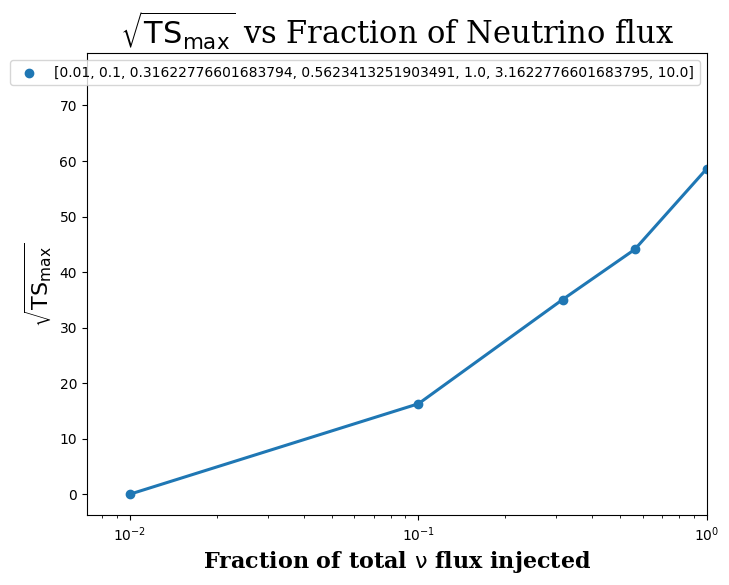

In [11]:
plt.figure(figsize=(8, 6))
axesfont = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 16,
        }
font = {'family': 'serif',
        'size': 22,
        'color':  'black',
        }
plt.plot(phio_const_norm, np.sqrt(tsmax), lw=2.2)
plt.scatter(phio_const_norm, np.sqrt(tsmax), label=phio_const_norm)
# plt.plot(small_f, np.array(tsmax), lw=2.2)
plt.xscale('log')
plt.xlim(0, 1)
plt.ylabel('$\mathsf{\sqrt{TS_{max}}}$', fontdict=axesfont)
plt.xlabel('Fraction of total $\mathsf{\u03BD}$ flux injected', fontdict=axesfont)
plt.title('$\mathsf{\sqrt{TS_{max}}}$ vs Fraction of Neutrino flux', fontdict=font)
plt.savefig('./outputs/TSmax_small_f.pdf', facecolor='w')
plt.legend()
plt.show()


In [12]:
from core.req_arrays import *
from core.signal_bag import hvovec

read icdata
read uptdata
read eadata
read mspdata


In [13]:
msra = msra[np.abs(msdec) < 85]
msdec = msdec[np.abs(msdec) < 85]

In [14]:
len(msra[msra < 150])

489

In [15]:
np.roll(msra, -1)[:-1]

array([  1.52      ,   1.75708333,   2.89166667, ..., 358.96370208,
       358.95258333, 358.9575    ])

In [16]:
angles_less_than_5 = []
lens = 0
for i in range(len(msra)):
    # for j in range(i+1, len(msra)):
        temp = np.abs(hvovec(msra[i], msdec[i], np.roll(msra, -i)[:-i], np.roll(msdec, -i)[:-i]))
        temp2 = len(temp[temp <= 5])
        lens += temp2
        angles_less_than_5.append(temp[temp <= 5])
        

In [17]:
lens

116655

In [18]:
3387 * 3386 /2

5734191.0

In [19]:
len(msra)

3387

In [20]:
import pickle
from numba import prange

from core.req_arrays import *
from core.stacking_analysis import *
import scipy.interpolate as interp

In [21]:
all_TSS_wmod1 = pickle.load(open('./pickle/all_TSS_wmod1_500_bins_30_psrs_-1.0_phi_fac_smeared.pkl', 'rb'))

In [22]:
len(all_TSS_wmod1[0])

1000

In [23]:
gamma_arr = np.array([-2, -2.2, -2.53, -3])

4.2230441872066896e-27
3.447764054734471e-27
1.6952323415541213e-27


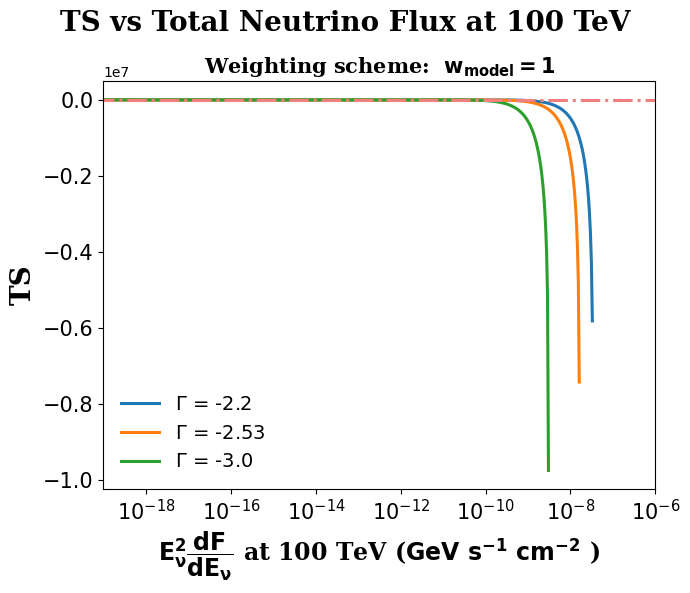

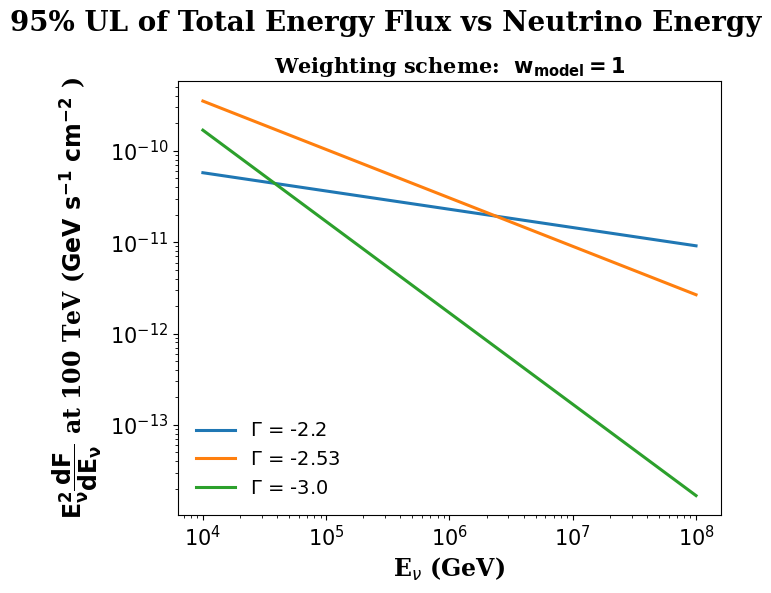

238.5120846089475 982 6.248788072006914e-08
257.2211581173169 978 5.594325706169343e-08
265.02069434696665 964 3.798215306190736e-08
256.74511966627375 931 1.5246957270175697e-08
####################################################################################################
####################################################################################################


In [24]:
phio = np.logspace(-48, -26, 1000)
all_e_UL = []
e_decade = [1e13, 1e14, 1e15, 1e16, 1e17]
for e_UL in e_decade:
    e2dfde = []

    for gamma in prange(len(gamma_arr)):
        temp = []
        for phi in range(len(phio)):
            temp.append( e_UL**2 * dfde(e_UL, gamma_arr[gamma], phio[phi]))        #in eV
        e2dfde.append(temp)
    e2dfde = np.asarray(e2dfde)

    all_e_UL.append(e2dfde)
mark = ['^', 'o', 's', 'd']


for g in range(3):
    print(phio[np.argmax(all_TSS_wmod1[g])]) 


all_UL = []

for gamma in prange(len(gamma_arr)):
    temp = []
    for i in all_e_UL:
        dist_g = interp.interp1d(all_TSS_wmod1[gamma], i[gamma]/1e9)
        temp.append(dist_g(-3.84))

        
    all_UL.append(temp)
e2dfde = np.asarray([1e28 * dfde(1e14, g, 1) * phio for g in gamma_arr])
# plt.style.use('default')
font = {'family': 'serif',
        'weight': 'bold',
        'size': 22,
        'color':  'black',
        }
smallerfont = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 15,
        }

axesfont = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 17,
        }

fig, axs = plt.subplots(1,1, figsize=(7, 6))

for gamma in [ 1, 2, 3]:#range(4):
    
    axs.plot(1e28 * dfde(1e14, gamma_arr[gamma], 1) *phio /1e9, all_TSS_wmod1[gamma], label='$\Gamma$ = ' + str(gamma_arr[gamma]), lw=2.2)# + ' with wt')    #in GeV
    # axs.vlines(1e19*phio[np.nanargmax(all_TSS_wmod1[gamma])], -1e7, 90,lw=2.2, label='95 % UPPER LIMIT $TS = -3.84$')
    # print(1e19*phio[np.nanargmax(all_TSS_wmod1[gamma])])
    

axs.set_title('Weighting scheme:  $\mathsf{\mathbf{w_{model} = 1}}$', fontdict=smallerfont)


# for i in range(3):
    
axs.legend(prop={'size':14}, framealpha=0, loc='lower left')
axs.hlines(-3.84, 1e-20, 1e-5, linestyles='dashed', lw=2.2, ls='-.', label='95 % UPPER LIMIT $TS = -3.84$', color='lightcoral')
axs.set_xscale('log')
axs.set_xlabel('$\mathsf{\mathbf{E^2_{\u03BD} \dfrac{dF}{dE_{\u03BD}}}}$ at 100 TeV ($\mathsf{\mathbf{GeV}}$ $\mathsf{\mathbf{s^{-1}}}$ $\mathsf{\mathbf{cm^{-2}}}$ )', fontdict=axesfont)
axs.set_ylabel('TS', fontdict=axesfont, fontsize=20)
axs.xaxis.set_tick_params(labelsize=15)
axs.yaxis.set_tick_params(labelsize=15)

# axs.set_ylim(-20, 6)
axs.set_xlim(0.95e-19, 1e-6)

plt.suptitle('TS vs Total Neutrino Flux at 100 TeV', fontweight='bold', fontsize=20, fontfamily='serif')

plt.tight_layout()
# plt.savefig(f'outputs/TS_vs_E2dfde_all_w_model_bins={len(enus)}_C_wt_all_psr_wmod1_cone_{cone_deg}.pdf')
# # plt.show()
# print(f'\nTS_vs_E2dfde_all_w_model_bins={len(enus)}_C_wt_all_psr_wmod1_cone_{cone_deg}.pdf\nDONE')
plt.show()

#SIMILAR PLOTS FOR 95% UPPER LIMIT 
fig, axs = plt.subplots(1, 1, figsize=(7, 6))




for gamma in range(1, len(gamma_arr)):

    axs.plot(np.divide(e_decade, 1e9), np.multiply(all_UL[gamma], 3), label='$\Gamma$ = ' + str(gamma_arr[gamma]), lw=2.2, ls='-')# + ' with wt')    #in GeV

    
axs.set_xscale('log')
axs.set_yscale('log')
axs.set_xlabel('E$_{\u03BD}$ (GeV)', fontdict=axesfont)
axs.set_ylabel('$\mathsf{\mathbf{E^2_{\u03BD} \dfrac{dF}{dE_{\u03BD}}}}$ at 100 TeV ($\mathsf{\mathbf{GeV}}$ $\mathsf{\mathbf{s^{-1}}}$ $\mathsf{\mathbf{cm^{-2}}}$ )', fontdict=axesfont)
axs.xaxis.set_tick_params(labelsize=15)
axs.yaxis.set_tick_params(labelsize=15)

axs.legend(prop={'size':14}, framealpha=0, loc='lower left')


axs.set_title('Weighting scheme:  $\mathsf{\mathbf{w_{model} = 1}}$', fontdict=smallerfont)


plt.suptitle('95% UL of Total Energy Flux vs Neutrino Energy', fontweight='bold', fontsize=20, fontfamily='serif')
plt.tight_layout()
# plt.savefig(f'outputs/UL_all_w_model_bins={len(enus)}_C_wt_all_psr_wmod1_cone_{cone_deg}.pdf')
plt.show()


for i in all_TSS_wmod1:
    print(max(i), np.argmax(i), 1e19 * np.logspace(-38, -26, 1000)[np.argmax(i)])


print('#'*100)
print('#'*100)


In [25]:
all_UL[1]

[array(1.92235568e-11),
 array(1.21292443e-11),
 array(7.65303579e-12),
 array(4.82873914e-12),
 array(3.04672842e-12)]

In [26]:
ul_wmod1 = pickle.load(open("outputs/UL_ALL_wmodel1.txt", 'rb'))
ul_wd_ws = pickle.load(open("outputs/UL_ALL_wd_ws0.txt", 'rb'))

In [29]:
np.shape(ul_wmod1)

(4, 5)

In [28]:
print(3*ul_wmod1[2][1])
print(3*ul_wd_ws[0][2][1])
print(3*ul_wd_ws[1][2][1])

8.288554825962993e-12
1.2975631977956739e-09
1.3698854305894453e-08
